In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('dataset/sales_train.csv')
test = pd.read_csv('dataset/test.csv')
shops = pd.read_csv('dataset/shops.csv')
items = pd.read_csv('dataset/items.csv')
items_categories = pd.read_csv('dataset/item_categories.csv')
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [80]:
print ('number of shops: ', train['shop_id'].max())
print ('number of items: ', train['item_id'].max())
num_month = train['date_block_num'].max()
print ('number of month: ', num_month)
print ('size of train: ', train.shape)
train.head()

number of shops:  59
number of items:  22169
number of month:  33
size of train:  (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [81]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [82]:
print ('number of categories: ', items['item_category_id'].max()) # the maximun number of category id
items.head()

number of categories:  83


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [83]:
train_clean = train.drop(labels = ['date', 'item_price'], axis = 1)
train_clean = train_clean.groupby(["item_id","shop_id","date_block_num"]).sum().reset_index()
train_clean = train_clean.rename(index=str, columns = {"item_cnt_day":"item_cnt_month"})
train_clean = train_clean[["item_id","shop_id","date_block_num","item_cnt_month"]]
train_clean

,item_id,shop_id,date_block_num,item_cnt_month
0,0,54,20,1.0
1,1,55,15,2.0
2,1,55,18,1.0
3,1,55,19,1.0
4,1,55,20,1.0
5,1,55,21,1.0
6,2,54,19,1.0
7,2,54,22,1.0
8,3,54,18,1.0
9,3,54,19,1.0


In [84]:
check = train_clean[["shop_id","item_id","date_block_num","item_cnt_month"]]
check = check.loc[check['shop_id'] == 5]
check = check.loc[check['item_id'] == 5037]
check

,shop_id,item_id,date_block_num,item_cnt_month
400439,5,5037,20,1.0
400440,5,5037,22,1.0
400441,5,5037,23,2.0
400442,5,5037,24,2.0
400443,5,5037,28,1.0
400444,5,5037,29,1.0
400445,5,5037,30,1.0
400446,5,5037,31,3.0
400447,5,5037,32,1.0


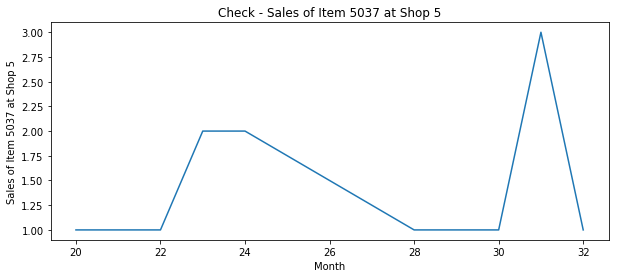

In [85]:
plt.figure(figsize=(10,4))
plt.title('Check - Sales of Item 5037 at Shop 5')
plt.xlabel('Month')
plt.ylabel('Sales of Item 5037 at Shop 5')
plt.plot(check["date_block_num"],check["item_cnt_month"]);

In [86]:
month_list=[i for i in range(num_month+1)]
shop=[]
for i in range(num_month+1):
    shop.append(5)
item = []
for i in range(num_month+1):
    item.append(5037)
# print(len(shop),len(item),len(month_list))
months_full = pd.DataFrame({'shop_id':shop, 'item_id':item,'date_block_num':month_list})
months_full

,shop_id,item_id,date_block_num
0,5,5037,0
1,5,5037,1
2,5,5037,2
3,5,5037,3
4,5,5037,4
5,5,5037,5
6,5,5037,6
7,5,5037,7
8,5,5037,8
9,5,5037,9


In [87]:
sales_5_5037 = pd.merge(check, months_full, how='right', on=['shop_id','item_id','date_block_num'])
sales_5_5037 = sales_5_5037.sort_values(by=['date_block_num'])
sales_5_5037.fillna(0.0,inplace=True)
sales_5_5037

,shop_id,item_id,date_block_num,item_cnt_month
9,5,5037,0,0.0
10,5,5037,1,0.0
11,5,5037,2,0.0
12,5,5037,3,0.0
13,5,5037,4,0.0
14,5,5037,5,0.0
15,5,5037,6,0.0
16,5,5037,7,0.0
17,5,5037,8,0.0
18,5,5037,9,0.0


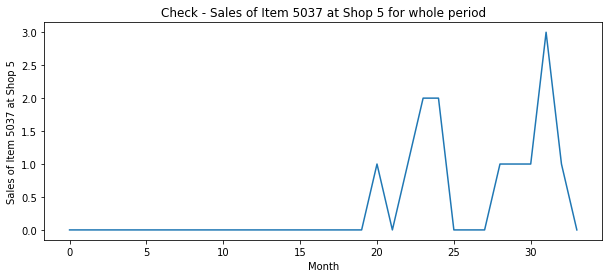

In [88]:
plt.figure(figsize=(10,4))
plt.title('Check - Sales of Item 5037 at Shop 5 for whole period')
plt.xlabel('Month')
plt.ylabel('Sales of Item 5037 at Shop 5')
plt.plot(sales_5_5037["date_block_num"],sales_5_5037["item_cnt_month"]);

In [89]:
for i in range(1,6):
    sales_5_5037["T_" + str(i)] = sales_5_5037.item_cnt_month.shift(i)
# sales_5_5037.fillna(0.0, inplace=True)
sales_5_5037

,shop_id,item_id,date_block_num,item_cnt_month,T_1,T_2,T_3,T_4,T_5
9,5,5037,0,0.0,NaN,NaN,NaN,NaN,NaN
10,5,5037,1,0.0,0.0,NaN,NaN,NaN,NaN
11,5,5037,2,0.0,0.0,0.0,NaN,NaN,NaN
12,5,5037,3,0.0,0.0,0.0,0.0,NaN,NaN
13,5,5037,4,0.0,0.0,0.0,0.0,0.0,NaN
14,5,5037,5,0.0,0.0,0.0,0.0,0.0,0.0
15,5,5037,6,0.0,0.0,0.0,0.0,0.0,0.0
16,5,5037,7,0.0,0.0,0.0,0.0,0.0,0.0
17,5,5037,8,0.0,0.0,0.0,0.0,0.0,0.0
18,5,5037,9,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
df = sales_5_5037[['shop_id','item_id','date_block_num','T_1','T_2','T_3','T_4','T_5', 'item_cnt_month']].reset_index()
df = df.drop(labels = ['index'], axis = 1)
df

,shop_id,item_id,date_block_num,T_1,T_2,T_3,T_4,T_5,item_cnt_month
0,5,5037,0,NaN,NaN,NaN,NaN,NaN,0.0
1,5,5037,1,0.0,NaN,NaN,NaN,NaN,0.0
2,5,5037,2,0.0,0.0,NaN,NaN,NaN,0.0
3,5,5037,3,0.0,0.0,0.0,NaN,NaN,0.0
4,5,5037,4,0.0,0.0,0.0,0.0,NaN,0.0
5,5,5037,5,0.0,0.0,0.0,0.0,0.0,0.0
6,5,5037,6,0.0,0.0,0.0,0.0,0.0,0.0
7,5,5037,7,0.0,0.0,0.0,0.0,0.0,0.0
8,5,5037,8,0.0,0.0,0.0,0.0,0.0,0.0
9,5,5037,9,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
train_df = df[:-3]
val_df = df[-3:]
x_train,y_train = train_df.drop(["item_cnt_month"],axis=1),train_df.item_cnt_month
x_val,y_val = val_df.drop(["item_cnt_month"],axis=1),val_df.item_cnt_month
print(x_train.shape,'\n')
print(y_train.shape,'\n')
print(x_val.shape,'\n')
print(y_val.shape,'\n')

(31, 8) 

(31,) 

(3, 8) 

(3,) 



In [119]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(15, input_shape=(1,8)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [120]:
# Reshape the data between -1 and 1 and to 3D
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_val)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [121]:
x_train_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_val_resaped = x_valid_scaled.reshape((x_valid_scaled.shape[0], 1, x_valid_scaled.shape[1]))

In [122]:
history = model_lstm.fit(x_train_reshaped, y_train, validation_data=(x_val_resaped, y_val),epochs=70, batch_size=12, verbose=2, shuffle=False)
y_pre = model_lstm.predict(x_val_resaped)
print(y_pre)


Train on 31 samples, validate on 3 samples
Epoch 1/70
 - 1s - loss: nan - acc: 0.2258 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/70
 - 0s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/70
 - 0s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/70
 - 0s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/70
 - 0s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/70
 - 0s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/70
 - 0s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 8/70
 - 0s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 9/70
 - 0s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 10/70
 - 0s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 11/70
 - 0s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 12/70
 - 0s - loss

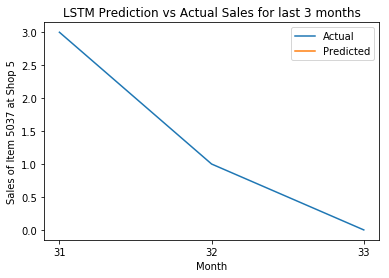

In [107]:
fig, ax = plt.subplots()
ax.plot(x_val['date_block_num'], y_val, label='Actual')
ax.plot(x_val['date_block_num'], y_pre, label='Predicted')
plt.title('LSTM Prediction vs Actual Sales for last 3 months')
plt.xlabel('Month')
plt.xticks(x_val['date_block_num'])
plt.ylabel('Sales of Item 5037 at Shop 5')
ax.legend()
plt.show()

In [101]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt
rmse = sqrt(mean_squared_error(y_val,y_pre))
print('Val RMSE: %.3f' % rmse)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').